In [1]:
%%capture
%run preprocessing.ipynb

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC

def train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function, g=None, c=None, d=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    results.append({'kernel': kernel,'decision function': decision_function, 'gamma': g, 'coef0': c , 'degree': d,'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})


# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Hyperparamenters
max_iter = 500000
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [1,2,3,4,5]
random_state = 42
decision_function_shape = ['ovo', 'ovr']
gamma = ['scale', 'auto']
coef0 = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10]

# Grid search
results = []
counter = 1

for kernel in kernels:

    # Each kernel has different parameters
    if kernel == 'linear':
        for decision_function in decision_function_shape:
            model = SVC(kernel=kernel, random_state=random_state, decision_function_shape=decision_function, max_iter=max_iter)
            train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function)
            print("I did " + str(counter) + " models")
            counter += 1

    elif kernel == 'poly':
        for decision_function in decision_function_shape:
            for g in gamma:
                for c in coef0:
                    for d in degrees:
                        model = SVC(kernel=kernel, random_state=random_state, decision_function_shape=decision_function, gamma=g, coef0=c, degree=d, max_iter=max_iter)
                        train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function, g, c, d)
                        print("I did " + str(counter) + " models")
                        counter += 1

    elif kernel == 'rbf':
        for decision_function in decision_function_shape:
            for g in gamma:
                model = SVC(kernel=kernel, random_state=random_state, decision_function_shape=decision_function, gamma=g, max_iter=max_iter)
                train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function, g)
                print("I did " + str(counter) + " models")
                counter += 1

    elif kernel == 'sigmoid':
        for decision_function in decision_function_shape:
            for g in gamma:
                for c in coef0:
                    model = SVC(kernel=kernel, random_state=random_state, decision_function_shape=decision_function, gamma=g, coef0=c, max_iter=max_iter)
                    train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function, g, c)
                    print("I did " + str(counter) + " models")
                    counter += 1

print("OMG I'm done!")

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import pandas as pd
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import numpy as np

# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Define the parameter space
param_distributions = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr'],
    'gamma': ['scale', 'auto'],
    'coef0': uniform(-10, 20),  # uniform distribution from -10 to 10
    'degree': randint(1, 6),  # integer values from 1 to 5
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(SVC(random_state=42, max_iter=1000000), param_distributions, n_iter=100, scoring=scoring , refit='f1',cv=5, n_jobs=-1)

# Fit it to the data
random_search.fit(X_train, y_train)

# Get the results
results = random_search.cv_results_

# Get the best parameters
best_params = random_search.best_params_

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [4]:
# Print results in a table
results_df = pd.DataFrame(results)
print(results_df)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_coef0   
0      298.317923     26.411100        55.276807       18.910078   -6.834152  \
1      297.001121     54.581030        50.278648       13.479229   -3.430945   
2     1699.220151    174.972219       105.668506        1.670682   -4.987323   
3      430.089342    118.197509         3.957639        0.104976    2.657199   
4      259.669002     62.673497         4.511755        0.605532    8.174795   
..            ...           ...              ...             ...         ...   
95    1777.529313    168.123454        82.939063        5.278599    7.380702   
96     244.043304     13.055199         8.337915        0.370379   -6.929052   
97     171.330254      4.951803         5.668814        0.214979   -9.936969   
98     496.171811     17.853404        42.857030        2.330162   -3.280973   
99     117.032908     10.335444         5.049159        0.310041    5.622508   

   param_decision_function_shape param_

<Axes: >

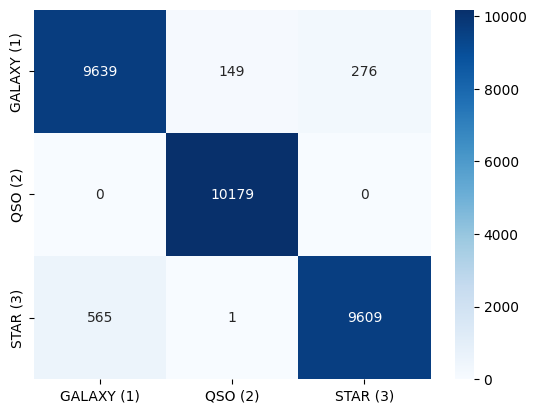

In [7]:
import seaborn as sns

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

In [6]:
np.save('results.npy', results_df)
results_df.to_csv('results.csv', index=False)
results_df.to_pickle('results.pkl')